In [1]:
# %load mlp_comparison.py
import src.core as mlApi
import src.core_configs as configs

def initTrainPredict(modelList, retrain=False, plot=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
    )

Using TensorFlow backend.


In [2]:
# 1. Define dataset specifics

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', 'C', '10min')

# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50TT002 - Cooling side outlet temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows



In [3]:
# 3. Define models

mlp_1x_16 = mlApi.MLP('mlp 1x16', layers=[16], dropout=0.3)
mlp_1x_32 = mlApi.MLP('mlp 1x32', layers=[32], dropout=0.3)
mlp_1x_64 = mlApi.MLP('mlp 1x64', layers=[64], dropout=0.3)
mlp_1x_128 = mlApi.MLP('mlp 1x128', layers=[128], dropout=0.3)

mlp_2x_16 = mlApi.MLP('mlp 2x16', layers=[16, 16], dropout=0.3)
mlp_2x_32 = mlApi.MLP('mlp 2x32', layers=[32, 32], dropout=0.3)
mlp_2x_64 = mlApi.MLP('mlp 2x64', layers=[64, 64], dropout=0.3)
mlp_2x_128 = mlApi.MLP('mlp 2x128', layers=[128, 128], dropout=0.3)

linear_cv = mlApi.Linear_Regularized('linear')

ensemble = mlApi.Ensemble('mlp 1x64 + linear', [mlp_1x_64, linear_cv])
ensemble2 = mlApi.Ensemble('mlp 2x64 + linear', [mlp_2x_64, linear_cv])

Training model linear
Model mlp 1x16 was loaded from file
Model mlp 1x32 was loaded from file
Model mlp 1x64 was loaded from file
Model mlp 1x128 was loaded from file
Model mlp 2x16 was loaded from file
Model mlp 2x32 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 1x16 |  0.052881 |   0.080618  |    0.003523   |  1262  |
|  mlp 1x32 |  0.031113 |   0.05013   |    0.002242   |  715   |
|  mlp 1x64 |  0.015481 |   0.019988  |    0.001507   |  645   |
| mlp 1x128 |  0.008416 |   0.014273  |    0.001417   |  737   |
|  mlp 2x16 |  0.100525 |   0.200729  |    0.018515   |  402   |
|  mlp 2x32 |  0.039666 |   0.067652  |    0.002084   |  1000  |
+-----------+-----------+-------------+---------------+--------+


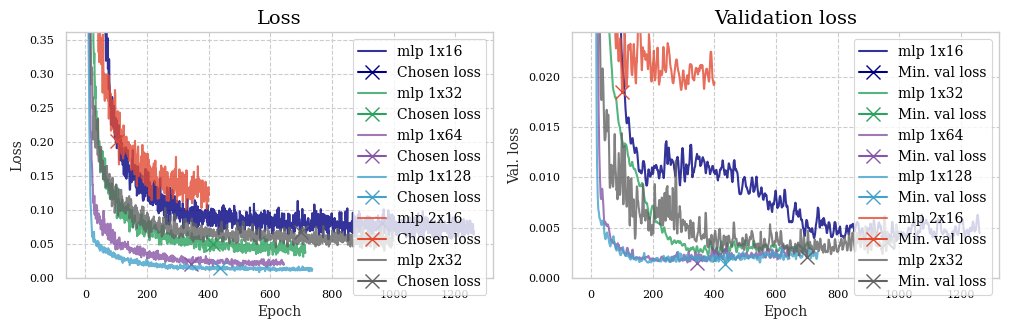

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.9938   |   0.934    |
|  mlp 1x16 |    0.9936   |   0.8794   |
|  mlp 1x32 |    0.996    |   0.7815   |
|  mlp 1x64 |    0.9982   |   0.8436   |
| mlp 1x128 |    0.9983   |   0.916    |
|  mlp 2x16 |    0.9629   |   0.8488   |
|  mlp 2x32 |    0.9815   |   0.8092   |
+-----------+-------------+------------+


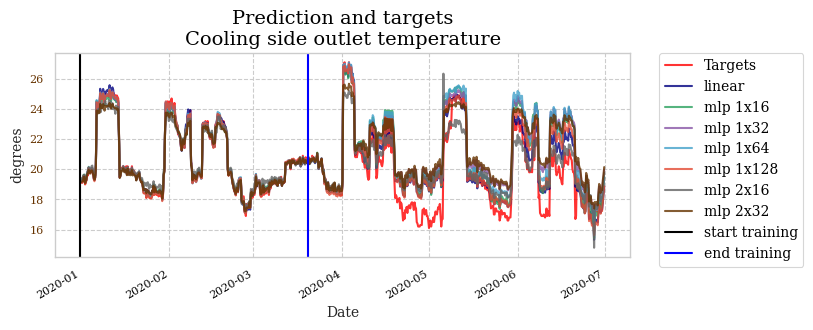

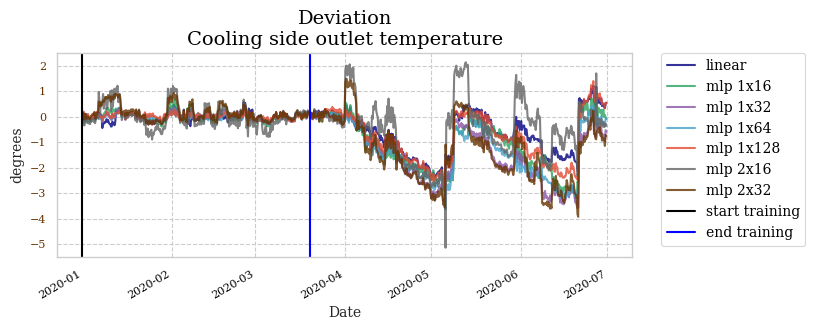

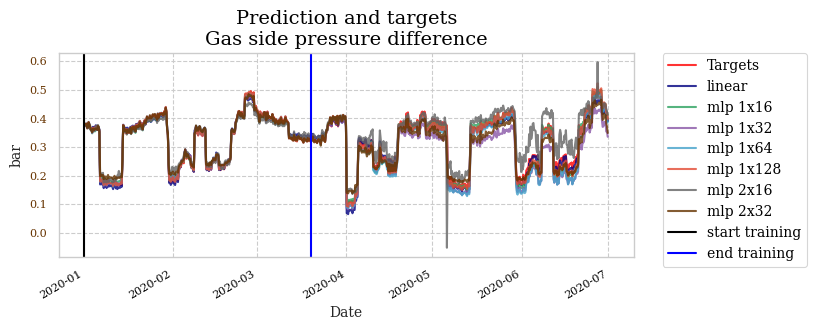

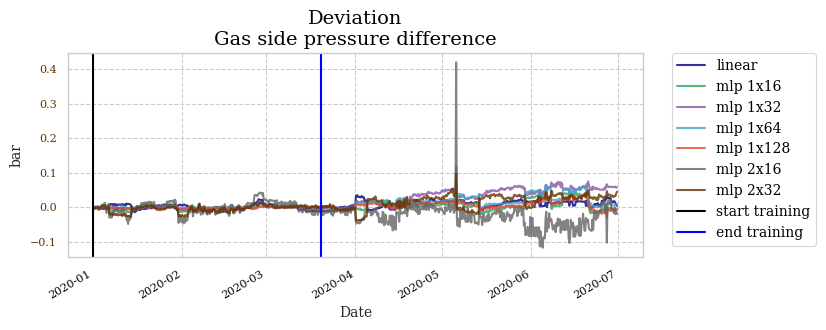

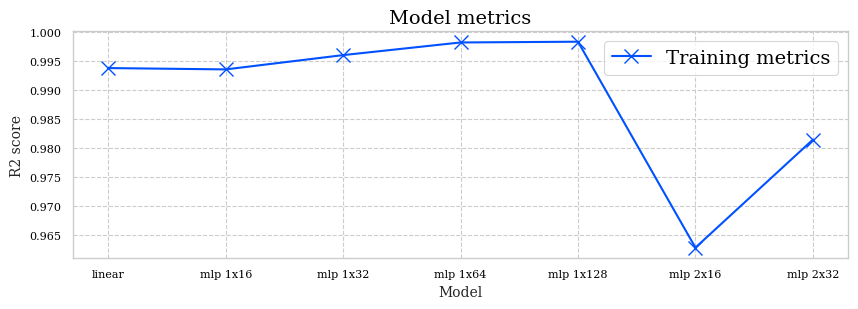

In [4]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_16,
    mlp_2x_32,
]

initTrainPredict(modelList)

Training model linear
Model mlp 2x64 was loaded from file
Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 2x64 |  0.024071 |   0.047466  |    0.002315   |  502   |
| mlp 2x128 |  0.014415 |   0.02731   |    0.002115   |  502   |
+-----------+-----------+-------------+---------------+--------+


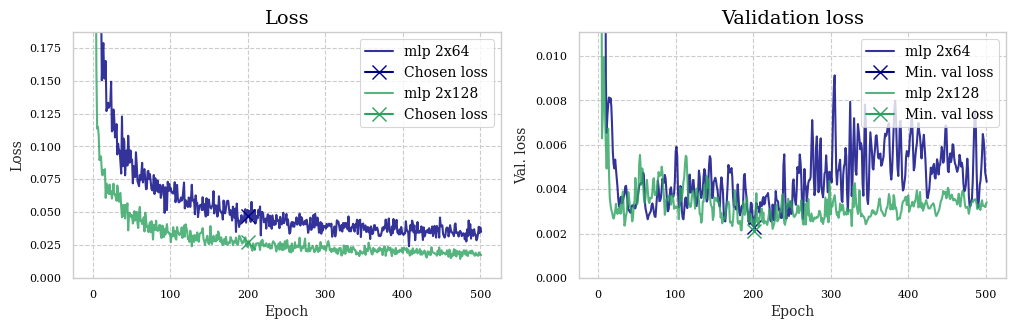

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.9938   |   0.934    |
|  mlp 2x64 |    0.9946   |   0.8589   |
| mlp 2x128 |    0.9974   |   0.8877   |
+-----------+-------------+------------+


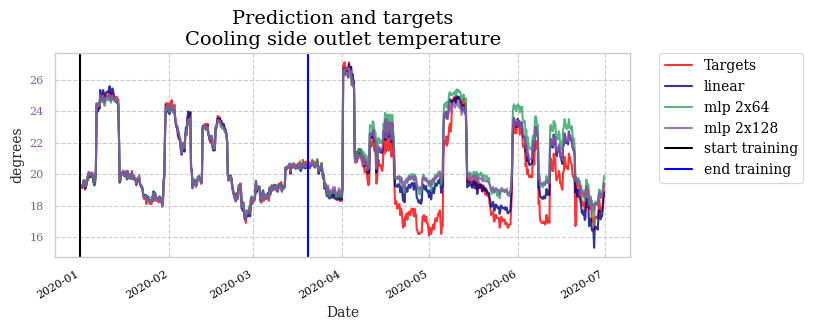

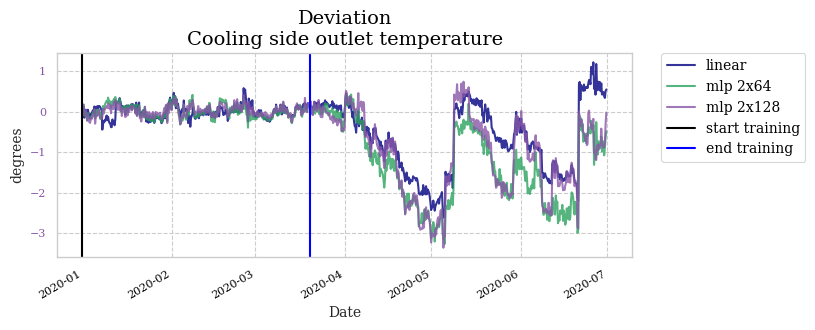

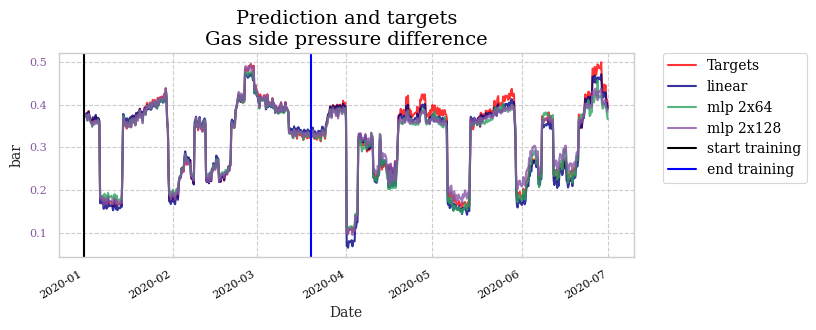

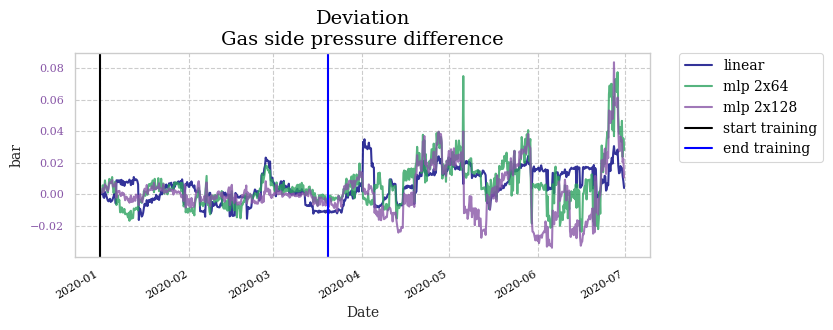

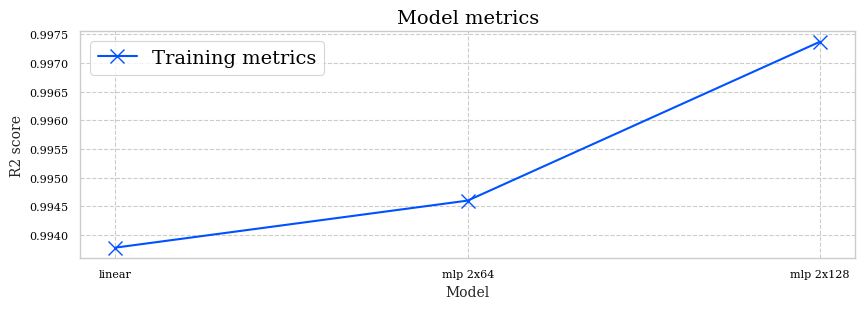

In [5]:
modelList = [
    linear_cv,
    mlp_2x_64,
    mlp_2x_128,
]

initTrainPredict(modelList)

Training model linear
Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| mlp 1x64 + linear, mlp 1x64 |  0.015587 |   0.027402  |    0.001503   |  319   |
| mlp 2x64 + linear, mlp 2x64 |  0.022214 |   0.049218  |    0.002361   |  325   |
+-----------------------------+-----------+-------------+---------------+--------+


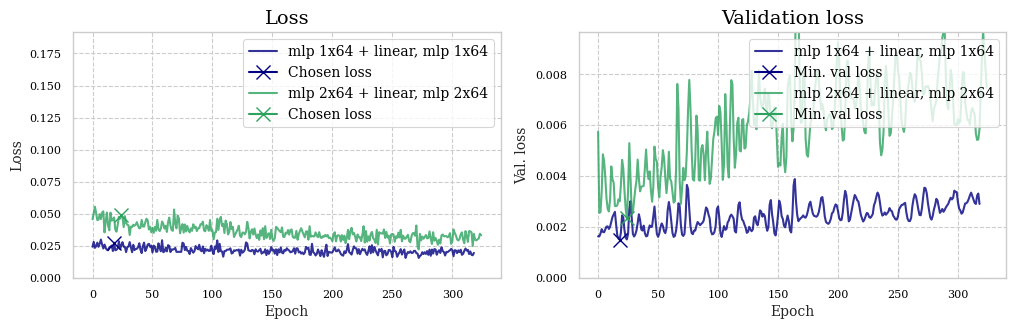

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|       linear      |    0.9938   |   0.934    |
| mlp 1x64 + linear |    0.9986   |   0.8617   |
| mlp 2x64 + linear |    0.9976   |   0.8909   |
+-------------------+-------------+------------+


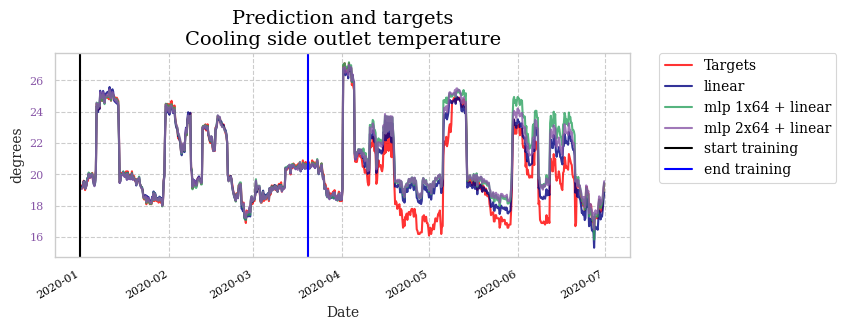

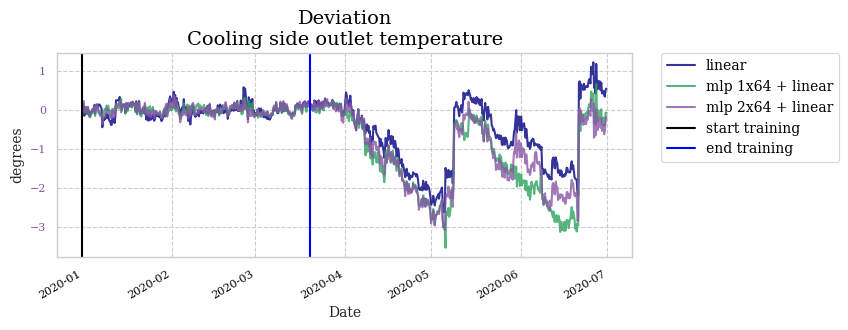

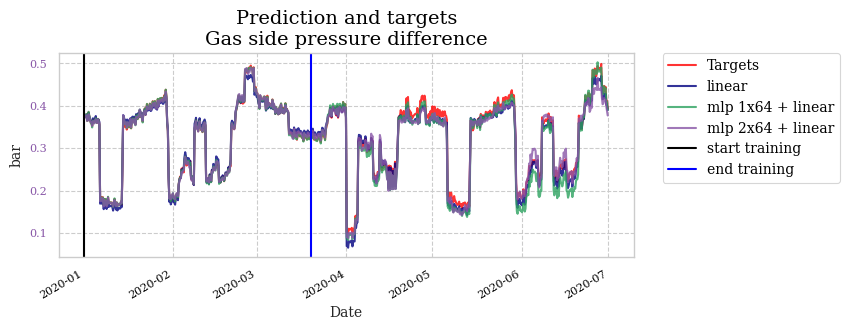

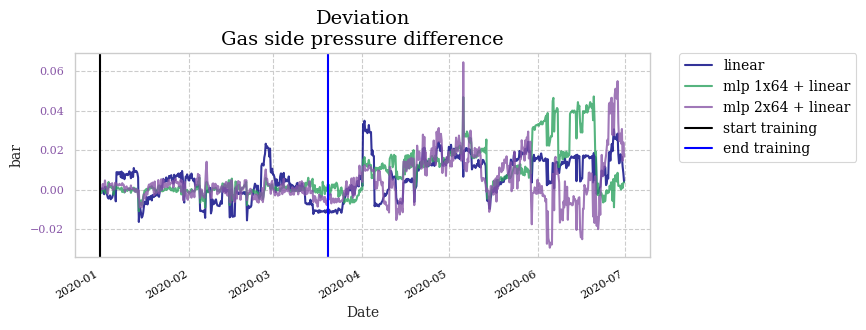

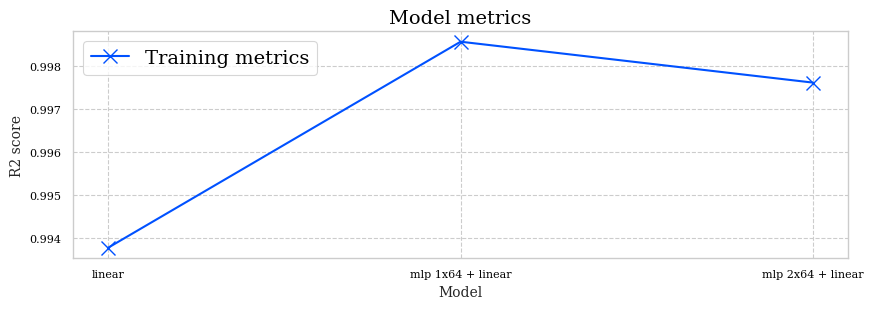

In [6]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
]

initTrainPredict(modelList)

mlApi.reset()

In [7]:
# 1. Define dataset specifics

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'C', '10min')

# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 13885 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows



In [8]:
mlp_1x_16 = mlApi.MLP('mlp 1x16', layers=[16], dropout=0.3)
mlp_1x_32 = mlApi.MLP('mlp 1x32', layers=[32], dropout=0.3)
mlp_1x_64 = mlApi.MLP('mlp 1x64', layers=[64], dropout=0.3)
mlp_1x_128 = mlApi.MLP('mlp 1x128', layers=[128], dropout=0.3)

mlp_2x_16 = mlApi.MLP('mlp 2x16', layers=[16, 16], dropout=0.3)
mlp_2x_32 = mlApi.MLP('mlp 2x32', layers=[32, 32], dropout=0.3)
mlp_2x_64 = mlApi.MLP('mlp 2x64', layers=[64, 64], dropout=0.3)
mlp_2x_128 = mlApi.MLP('mlp 2x128', layers=[128, 128], dropout=0.3)

linear_cv = mlApi.Linear_Regularized('linear')

ensemble = mlApi.Ensemble('mlp 1x64 + linear', [mlp_1x_64, linear_cv])
ensemble2 = mlApi.Ensemble('mlp 2x64 + linear', [mlp_2x_64, linear_cv])

Training model linear
Model mlp 1x16 was loaded from file
Model mlp 1x32 was loaded from file
Model mlp 1x64 was loaded from file
Model mlp 1x128 was loaded from file
Model mlp 2x16 was loaded from file
Model mlp 2x32 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 1x16 |  0.454164 |   0.55639   |    1.72566    |  304   |
|  mlp 1x32 |  0.407057 |   0.574997  |    1.375173   |  302   |
|  mlp 1x64 |  0.370477 |   0.403066  |    1.952459   |  307   |
| mlp 1x128 |  0.345481 |   0.55849   |    1.696943   |  301   |
|  mlp 2x16 |  0.455086 |   0.996223  |    1.054864   |  301   |
|  mlp 2x32 |  0.363819 |   0.721563  |    1.480559   |  301   |
+-----------+-----------+-------------+---------------+--------+


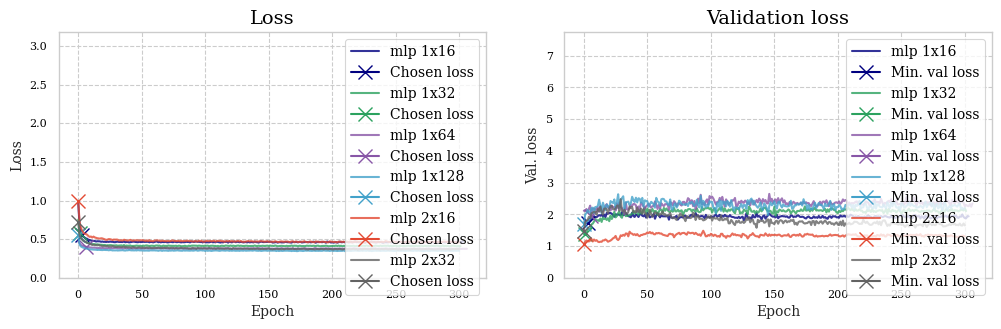

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.4405   |  -0.9779   |
|  mlp 1x16 |    0.2882   |  -1.0368   |
|  mlp 1x32 |    0.3581   |  -0.8241   |
|  mlp 1x64 |    0.322    |  -1.3888   |
| mlp 1x128 |    0.3293   |  -0.8968   |
|  mlp 2x16 |    0.2674   |  -0.4255   |
|  mlp 2x32 |    0.342    |  -0.8077   |
+-----------+-------------+------------+


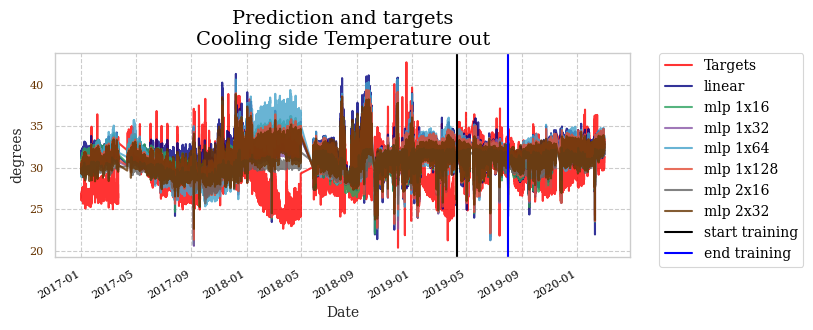

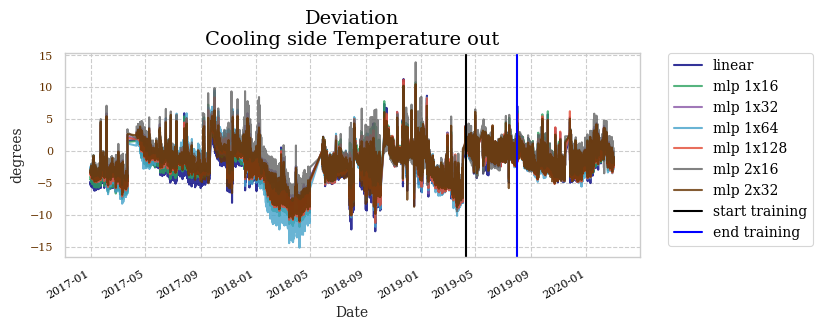

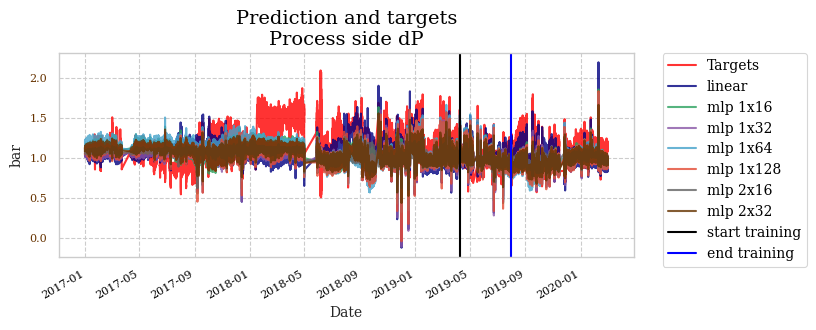

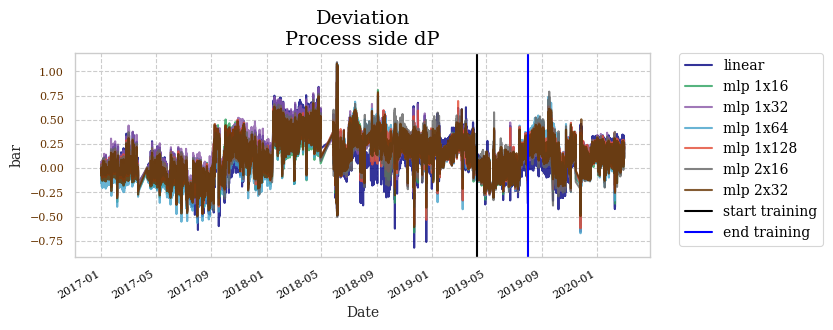

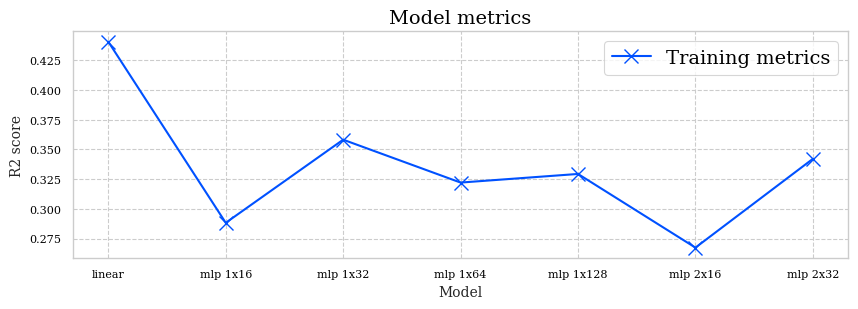

In [9]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_16,
    mlp_2x_32,
]

initTrainPredict(modelList)

Training model linear
Model mlp 2x64 was loaded from file
Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 2x64 |  0.297285 |   0.333126  |    1.422824   |  375   |
| mlp 2x128 |  0.250416 |   0.278693  |    1.508482   |  382   |
+-----------+-----------+-------------+---------------+--------+


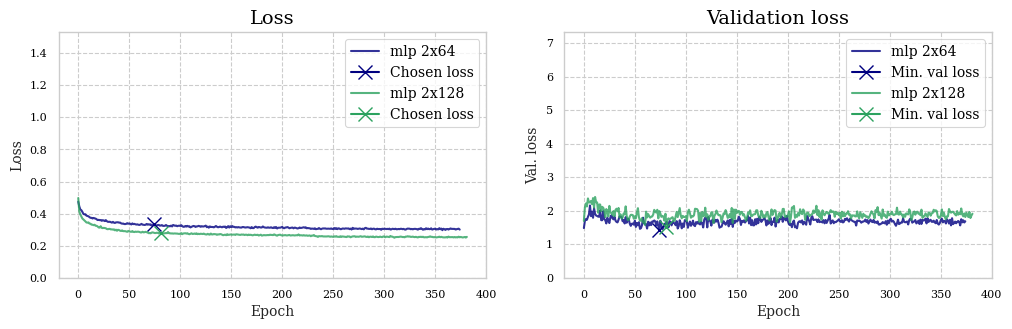

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.4405   |  -0.9779   |
|  mlp 2x64 |    0.4927   |  -1.2156   |
| mlp 2x128 |    0.5057   |  -1.4263   |
+-----------+-------------+------------+


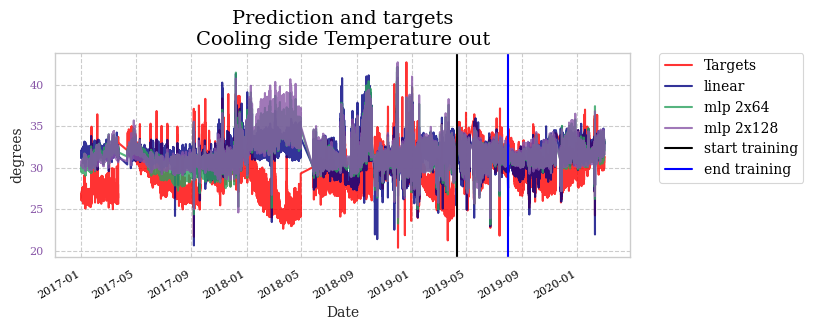

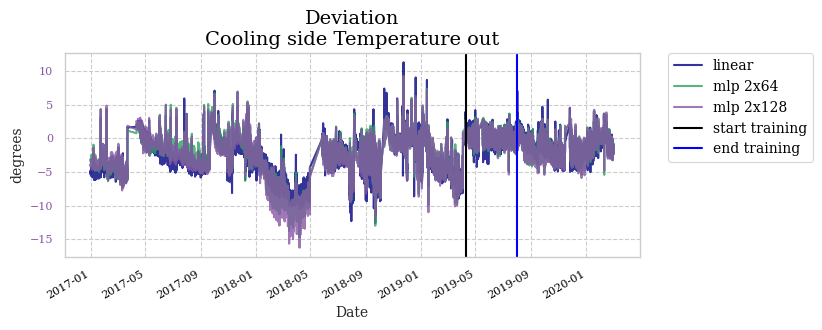

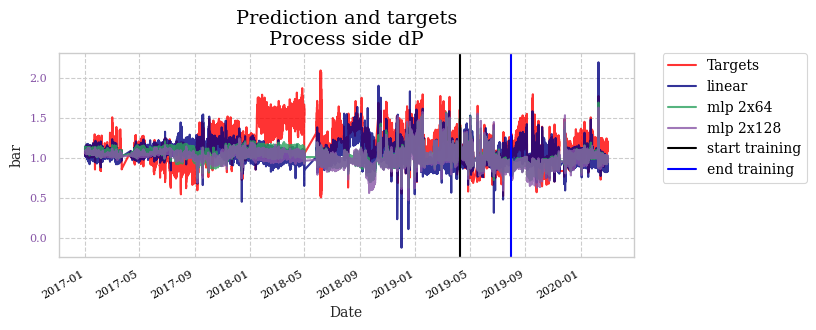

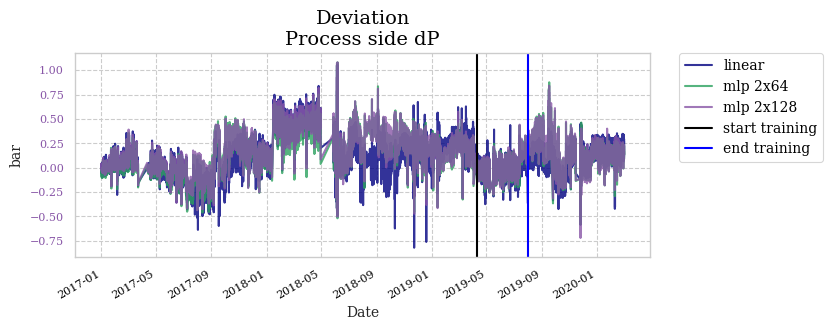

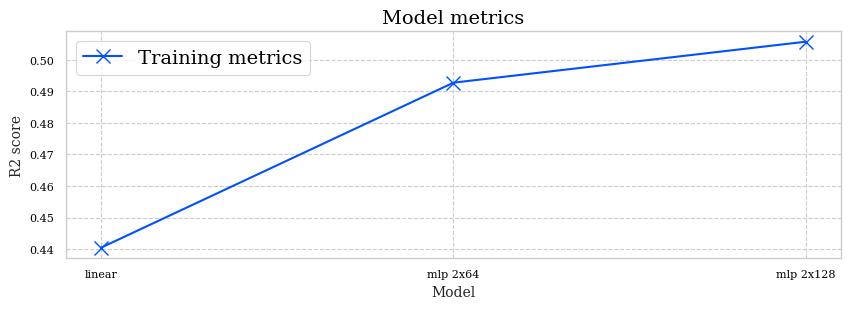

In [10]:
modelList = [
    linear_cv,
    mlp_2x_64,
    mlp_2x_128,
]

initTrainPredict(modelList)

Training model linear
Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| mlp 1x64 + linear, mlp 1x64 |  0.370477 |   0.403066  |    1.952459   |  307   |
| mlp 2x64 + linear, mlp 2x64 |  0.297285 |   0.333126  |    1.422824   |  375   |
+-----------------------------+-----------+-------------+---------------+--------+


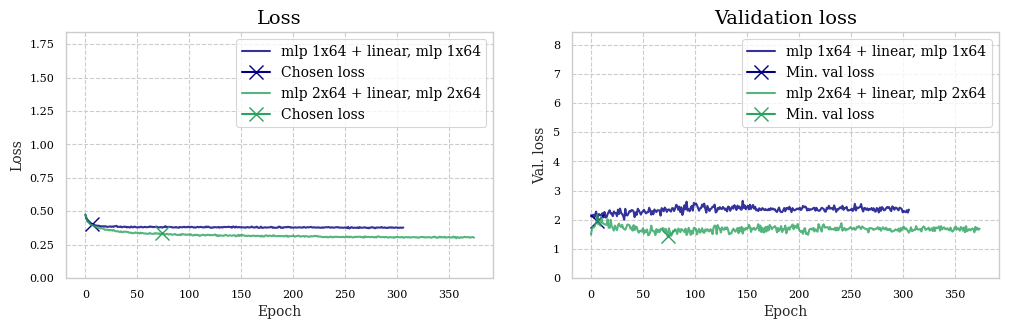

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|       linear      |    0.4405   |  -0.9779   |
| mlp 1x64 + linear |    0.5324   |  -1.4013   |
| mlp 2x64 + linear |    0.5934   |  -1.2004   |
+-------------------+-------------+------------+


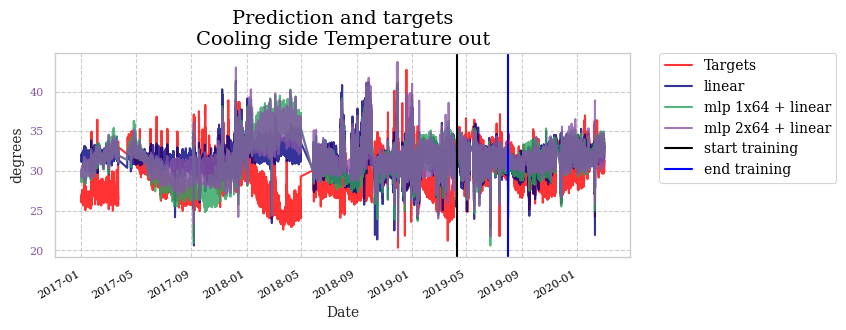

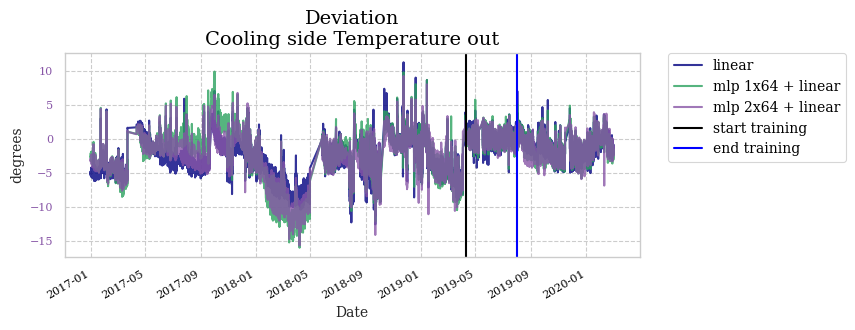

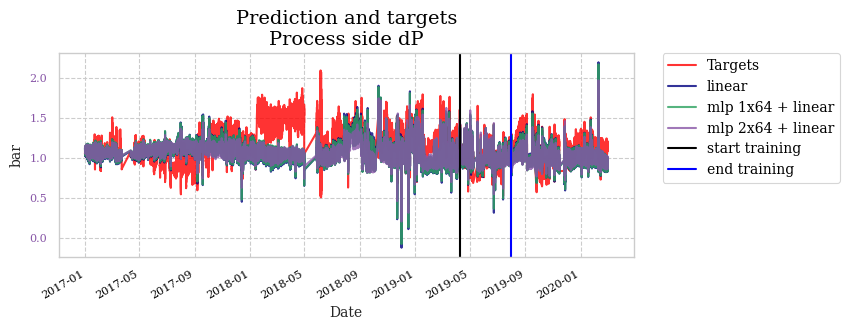

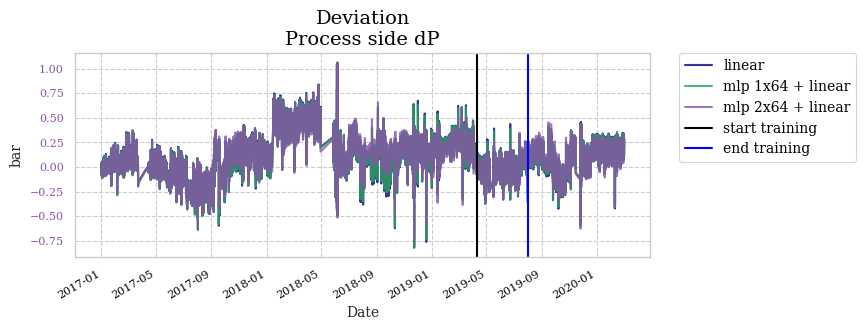

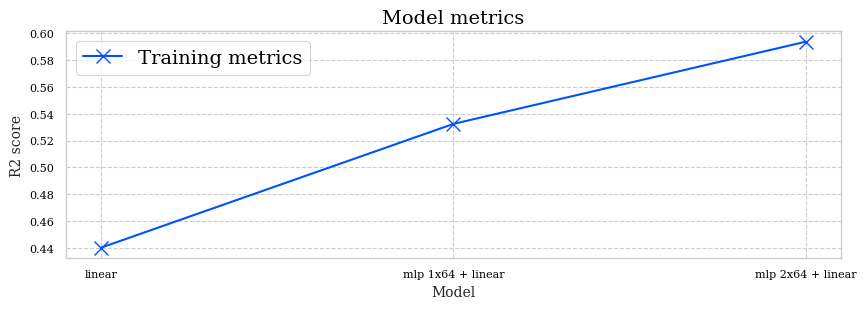

In [11]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
]

initTrainPredict(modelList)